In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\hp\New York City Taxi Fare Prediction\New_York_City_Taxi_Fare_Prediction.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

<h1> Data Preprocessing </h1>

In [7]:
def min_max():
    print(df['longitude_of_pickup'].max(),df['longitude_of_pickup'].min())
    print(df['latitude_of_pickup'].max(),df['latitude_of_pickup'].min())

    print(df['longitude_of_dropoff'].max(),df['longitude_of_dropoff'].min())
    print(df['latitude_of_dropoff'].max(),df['latitude_of_dropoff'].min())
min_max()

40.783472 -75.42384832
401.083332 -74.006893
40.851027 -84.654241
43.41519 -74.006377


Latitude is always range between -90 to 90

Longitude is always range between -180 to 180

And whatever above this range is wrong data

First check any data above this range

In [8]:
def coordinate_data():
    print(df[(df['longitude_of_pickup']>180) |(df['longitude_of_pickup']<-180) | (df['longitude_of_pickup']==0) ]['longitude_of_pickup'].count())
    print(df[(df['latitude_of_pickup']>90) |(df['latitude_of_pickup']<-90) | (df['latitude_of_pickup']==0) ]['latitude_of_pickup'].count())
    print(df[(df['longitude_of_dropoff']>180) |(df['longitude_of_dropoff']<-180) | (df['longitude_of_dropoff']==0)]['longitude_of_dropoff'].count())
    print(df[(df['latitude_of_dropoff']>90) |(df['latitude_of_dropoff']<-90) | (df['latitude_of_dropoff']==0) ]['latitude_of_dropoff'].count())

coordinate_data()

955
956
958
955


We can see so many records are out of range so its not possible to have 
Let's remove it...

We will use <b> ~ </b> sign to remove all data which match condition

In [9]:
df=df[~((df['longitude_of_pickup']>180) |(df['longitude_of_pickup']<-180) | (df['longitude_of_pickup']==0))]
df=df[~((df['latitude_of_pickup']>90) |(df['latitude_of_pickup']<-90) | (df['latitude_of_pickup']==0))]
df=df[~((df['longitude_of_dropoff']>180) |(df['longitude_of_dropoff']<-180) | (df['longitude_of_dropoff']==0))]
df=df[~((df['latitude_of_dropoff']>90) |(df['latitude_of_dropoff']<-90) | (df['latitude_of_dropoff']==0))]

# call function to check
coordinate_data()
min_max()

0
0
0
0
40.783472 -75.42384832
43.098708 -74.006893
40.851027 -84.654241
43.41519 -74.006377


In [10]:
# remove where pickup and drop location are same
print(df[(df['longitude_of_pickup']==df['longitude_of_dropoff']) & (df['latitude_of_pickup']==df['latitude_of_dropoff'])].shape)
df=df[~((df['longitude_of_pickup']==df['longitude_of_dropoff']) & (df['latitude_of_pickup']==df['latitude_of_dropoff']))]

(535, 8)


In [11]:
#boundary for new york latitude longitude...

boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [12]:
print(df[(df['latitude_of_pickup']<=boundary['min_lat']) | (df['latitude_of_pickup']>=boundary['max_lat'])].shape[0])
print(df[(df['longitude_of_pickup']<=boundary['min_lang']) | (df['longitude_of_pickup']>=boundary['max_lang'])].shape[0])
print(df[(df['latitude_of_dropoff']<=boundary['min_lat']) | (df['latitude_of_dropoff']>=boundary['max_lat'])].shape[0])
print(df[(df['longitude_of_dropoff']<=boundary['min_lang']) | (df['longitude_of_dropoff']>=boundary['max_lang'])].shape[0])

44
33
46
34


In [13]:
df=df[~((df['latitude_of_pickup']<=boundary['min_lat']) | (df['latitude_of_pickup']>=boundary['max_lat']))]
df=df[~((df['longitude_of_pickup']<=boundary['min_lang']) | (df['longitude_of_pickup']>=boundary['max_lang']))]

df=df[~((df['latitude_of_dropoff']<=boundary['min_lat']) | (df['latitude_of_dropoff']>=boundary['max_lat']))]
df=df[~((df['longitude_of_dropoff']<=boundary['min_lang']) | (df['longitude_of_dropoff']>=boundary['max_lang']))]

df.shape

(48395, 8)

Our system is not capable of proessing <b>20 Millions</b> records.

Processing <b>20 Millions</b> will take lot's of time

I'll select randomly <b>10% </b>dataset and make model

In [14]:
#Randomly select 10% data 

df = df.sample(frac=0.1)
df.shape

(4840, 8)

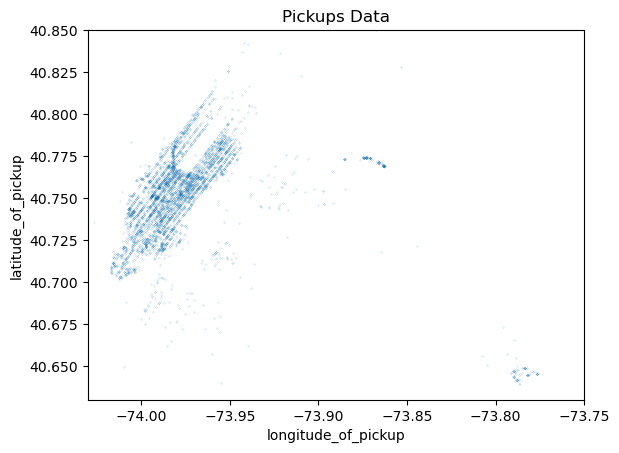

In [15]:
df.plot(y='latitude_of_pickup',x='longitude_of_pickup',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

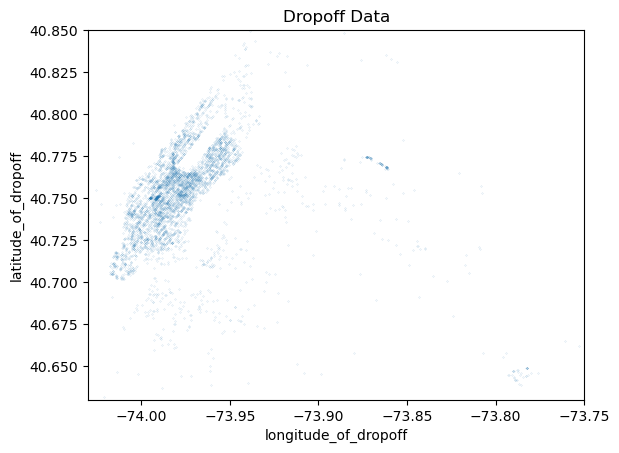

In [16]:
df.plot(y='latitude_of_dropoff',x='longitude_of_dropoff',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Passenger Count Data

In [17]:
df['no_of_passenger']=df['no_of_passenger'].astype(int)
print(df['no_of_passenger'].max())
print(df['no_of_passenger'].min())

6
0


<Axes: xlabel='count', ylabel='no_of_passenger'>

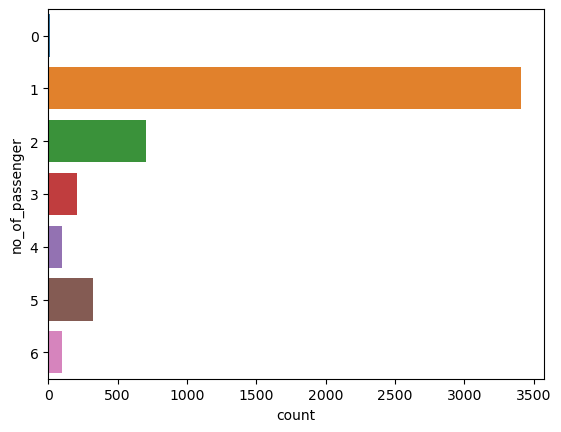

In [18]:
sns.countplot(y='no_of_passenger',data=df)

In [19]:
df=df[~((df['no_of_passenger']>6))]
df.shape

(4840, 8)

Fare amount can not be negative so remove this data

In [20]:
df[df['amount']<=0]['amount'].count()
df=df[~(df['amount']<=0)]

In [21]:
def select_within_boundingbox(df, BB):
    return ((df["longitude_of_pickup"] >= BB[0]) & (df["longitude_of_pickup"] <= BB[1]) & 
            (df["latitude_of_pickup"] >= BB[2]) & (df["latitude_of_pickup"] <= BB[3]) &
            (df["longitude_of_dropoff"] >= BB[0]) & (df["longitude_of_dropoff"] <= BB[1]) &
            (df["latitude_of_dropoff"] >= BB[2]) & (df["latitude_of_dropoff"] <= BB[3]))

#### Load Image of NYC Map for Visualization

In [22]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [23]:
nyc_map = plt.imread('nyc_-74.5_-72.8_40.5_41.8.png')

In [24]:
df= df[select_within_boundingbox(df, BB)]

In [25]:
print("New size {}".format(len(df)))

New size 4837


#### Function will be used for plotting data on NYC Map

In [26]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16, 10))
    axs[0].scatter(df["longitude_of_pickup"], df["latitude_of_pickup"], alpha = alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup Locations')
    axs[0].imshow(nyc_map, extent=BB)
    
    axs[1].scatter(df["longitude_of_dropoff"], df["latitude_of_dropoff"] , alpha = alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff Locations')
    axs[1].imshow(nyc_map, extent=BB)

#### Plotting Training Data on map

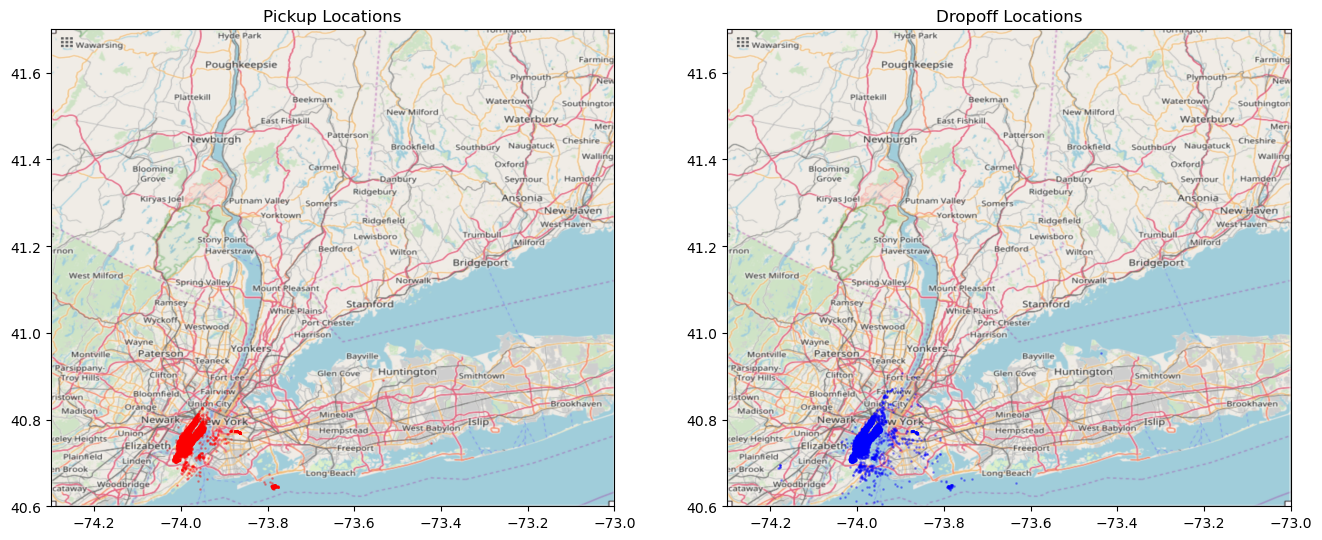

In [27]:
plot_on_map(df, BB, nyc_map, s=1, alpha=0.3)

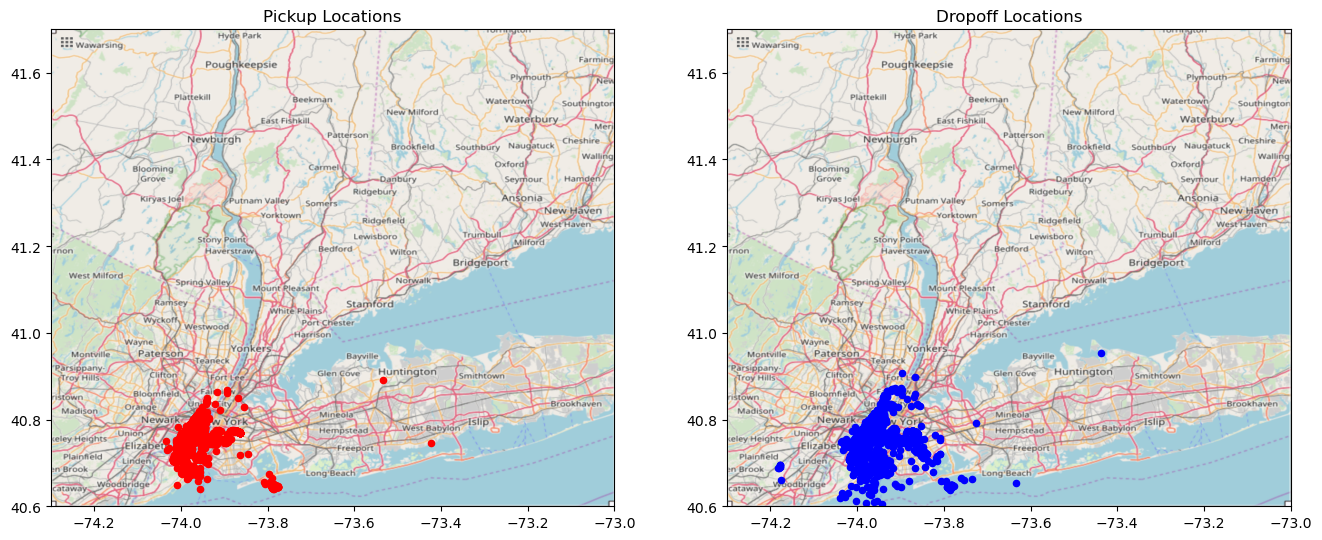

In [28]:
plot_on_map(df, BB, nyc_map, alpha=1.0, s=20)

### Scatter Plot

In [29]:
def plot_hires(df, BB, figsize=(12, 12), ax=None, c=('r', 'b')):
    if ax == None:
        fig, ax = plt.subplots(1, 1, figsize=figsize)

    idx = select_within_boundingbox(df, BB)
    ax.scatter(df[idx].longitude_of_pickup, df[idx].latitude_of_pickup, c=c[0], s=0.01, alpha=0.5)
    ax.scatter(df[idx].longitude_of_dropoff, df[idx].latitude_of_dropoff, c=c[1], s=0.01, alpha=0.5)

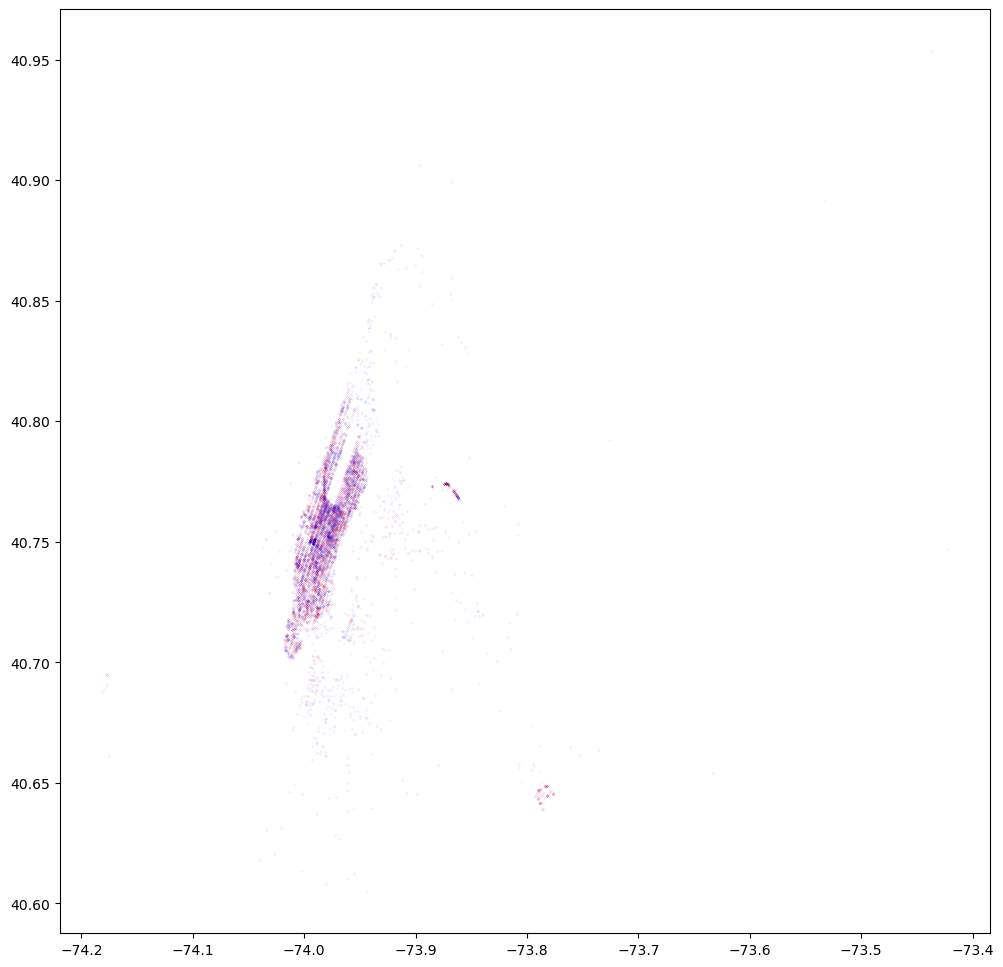

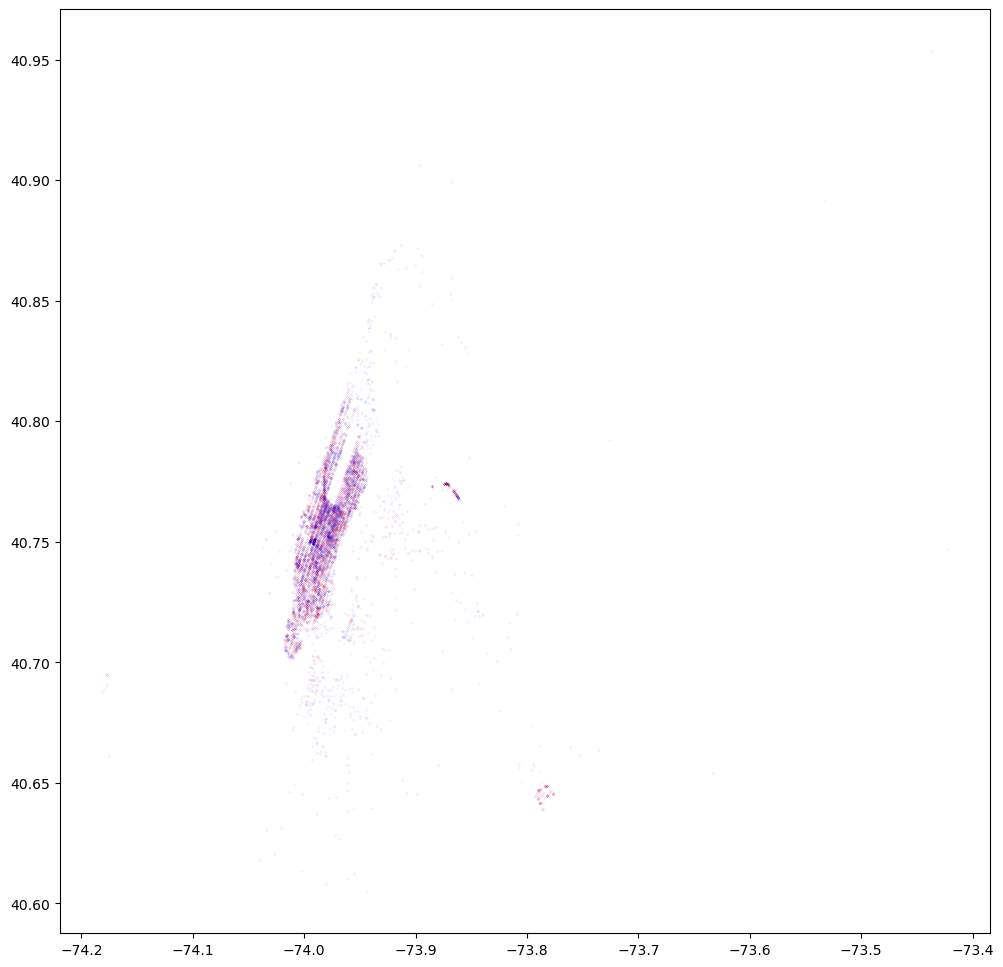

In [30]:
plot_hires(df, (-74.3, -73.1, 40.6, 41.65))
plot_hires(df, (-74.26, -72.98, 40.57, 41.71))

<h1>Feature Engineering </h1>

Extract day,month,year from date_time_of_pickup

In [31]:
df['pickup_day']=pd.to_datetime(df.date_time_of_pickup,format='%Y-%m-%d %H:%M:%S UTC').dt.day
df['pickup_month']=pd.to_datetime(df.date_time_of_pickup,format='%Y-%m-%d %H:%M:%S UTC').dt.month
df['pickup_year']=pd.to_datetime(df.date_time_of_pickup,format='%Y-%m-%d %H:%M:%S UTC').dt.year

In [32]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,pickup_year
34569,11:16.0,9.5,2012-11-25 02:11:16 UTC,-73.985373,40.741911,-74.005227,40.715571,2,25,11,2012
48331,46:51.0,8.5,2011-03-07 06:46:51 UTC,-73.994473,40.760908,-73.959746,40.773734,1,7,3,2011
15578,38:48.0,11.7,2009-03-20 12:38:48 UTC,-73.983427,40.730203,-73.988912,40.752789,1,20,3,2009
1126,35:00.0,6.5,2014-07-16 10:35:00 UTC,-73.994628,40.741102,-73.987987,40.746582,1,16,7,2014
14888,23:02.0,8.5,2013-01-07 15:23:02 UTC,-73.982489,40.768560,-73.965233,40.753008,1,7,1,2013


Let's extract weekday from date_time_of_pickup

0 Monday

6 Sunday

In [33]:
df['pickup_weekday'] = pd.DatetimeIndex(df.date_time_of_pickup).dayofweek

Seprate pickup hour from date_time_of_pickup column

In [34]:
df['pickup_hour']=pd.to_datetime(df.date_time_of_pickup,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour
34569,11:16.0,9.5,2012-11-25 02:11:16 UTC,-73.985373,40.741911,-74.005227,40.715571,2,25,11,2012,6,2
48331,46:51.0,8.5,2011-03-07 06:46:51 UTC,-73.994473,40.760908,-73.959746,40.773734,1,7,3,2011,0,6
15578,38:48.0,11.7,2009-03-20 12:38:48 UTC,-73.983427,40.730203,-73.988912,40.752789,1,20,3,2009,4,12
1126,35:00.0,6.5,2014-07-16 10:35:00 UTC,-73.994628,40.741102,-73.987987,40.746582,1,16,7,2014,2,10
14888,23:02.0,8.5,2013-01-07 15:23:02 UTC,-73.982489,40.768560,-73.965233,40.753008,1,7,1,2013,0,15


Let's add the feature called <b>mid night trip</b> usually fare during night hours are high compare to day time

The trip between night 11'o clock to morning 5'o clock are labelled mid night trip  

In [35]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip
34569,11:16.0,9.5,2012-11-25 02:11:16 UTC,-73.985373,40.741911,-74.005227,40.715571,2,25,11,2012,6,2,1
48331,46:51.0,8.5,2011-03-07 06:46:51 UTC,-73.994473,40.760908,-73.959746,40.773734,1,7,3,2011,0,6,0
15578,38:48.0,11.7,2009-03-20 12:38:48 UTC,-73.983427,40.730203,-73.988912,40.752789,1,20,3,2009,4,12,0
1126,35:00.0,6.5,2014-07-16 10:35:00 UTC,-73.994628,40.741102,-73.987987,40.746582,1,16,7,2014,2,10,0
14888,23:02.0,8.5,2013-01-07 15:23:02 UTC,-73.982489,40.768560,-73.965233,40.753008,1,7,1,2013,0,15,0


New York City has rush hour means heavy traffic from 4 PM to 8 PM 

So fare rates may differ from other time

In [36]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
34569,11:16.0,9.5,2012-11-25 02:11:16 UTC,-73.985373,40.741911,-74.005227,40.715571,2,25,11,2012,6,2,1,0
48331,46:51.0,8.5,2011-03-07 06:46:51 UTC,-73.994473,40.760908,-73.959746,40.773734,1,7,3,2011,0,6,0,0
15578,38:48.0,11.7,2009-03-20 12:38:48 UTC,-73.983427,40.730203,-73.988912,40.752789,1,20,3,2009,4,12,0,0
1126,35:00.0,6.5,2014-07-16 10:35:00 UTC,-73.994628,40.741102,-73.987987,40.746582,1,16,7,2014,2,10,0,0
14888,23:02.0,8.5,2013-01-07 15:23:02 UTC,-73.982489,40.768560,-73.965233,40.753008,1,7,1,2013,0,15,0,0


During snow season the taxi is very less available compare to other months i.e. taxi fare during snow season is high. 

NYC has the snow season from December to March but December and March has less snow compare to Jan and Feb

So we will check if trip was in month of Jan and Feb it is during snow season 

In [37]:
df['snow_season']=((df['pickup_month']==1) | (df['pickup_month']==2)).astype(int)
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_day,pickup_month,pickup_year,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip,snow_season
34569,11:16.0,9.5,2012-11-25 02:11:16 UTC,-73.985373,40.741911,-74.005227,40.715571,2,25,11,2012,6,2,1,0,0
48331,46:51.0,8.5,2011-03-07 06:46:51 UTC,-73.994473,40.760908,-73.959746,40.773734,1,7,3,2011,0,6,0,0,0
15578,38:48.0,11.7,2009-03-20 12:38:48 UTC,-73.983427,40.730203,-73.988912,40.752789,1,20,3,2009,4,12,0,0,0
1126,35:00.0,6.5,2014-07-16 10:35:00 UTC,-73.994628,40.741102,-73.987987,40.746582,1,16,7,2014,2,10,0,0,0
14888,23:02.0,8.5,2013-01-07 15:23:02 UTC,-73.982489,40.768560,-73.965233,40.753008,1,7,1,2013,0,15,0,0,1


<h3> Mapping </h3>

<b>Convert specific pickup and drop Coordinates into location </b>

We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [46]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

In [47]:
def pickup_place(place,train):
    data=train[((train['latitude_of_pickup']>= place['min_lat']) & (train['latitude_of_pickup']<= place['max_lat']) & (train['longitude_of_pickup']>= place['min_long']) & (train['longitude_of_pickup']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , pickup_place(JFK,df).shape)
print("Manhattan Pickup Total " , pickup_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , pickup_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , pickup_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , pickup_place(LaGuardia,df).shape)

JFK Pickup Total  (76, 16)
Manhattan Pickup Total  (4533, 16)
Brroklyn Pickup Total  (55, 16)
Bronx Pickup Total  (5, 16)
LaGuardia Pickup Total  (109, 16)


In [48]:
def drop_place(place,train):
    data=train[((train['latitude_of_dropoff']>= place['min_lat']) & (train['latitude_of_dropoff']<= place['max_lat']) & (train['longitude_of_dropoff']>= place['min_long']) & (train['longitude_of_dropoff']<= place['max_long']))]    
    return data

print("JFK Pickup Total " , drop_place(JFK,df).shape)
print("Manhattan Pickup Total " , drop_place(Manhattan,df).shape)
print("Brroklyn Pickup Total " , drop_place(Brooklyn,df).shape)
print("Bronx Pickup Total " , drop_place(Bronx,df).shape)
print("LaGuardia Pickup Total " , drop_place(LaGuardia,df).shape)

JFK Pickup Total  (35, 16)
Manhattan Pickup Total  (4392, 16)
Brroklyn Pickup Total  (114, 16)
Bronx Pickup Total  (30, 16)
LaGuardia Pickup Total  (67, 16)


In [49]:
def plotPickupAreaEachPlace(Area,data,ax):
    d=pickup_place(Area,data)
    d.plot(y='latitude_of_pickup',x='longitude_of_pickup',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

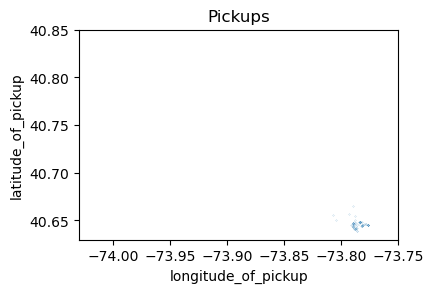

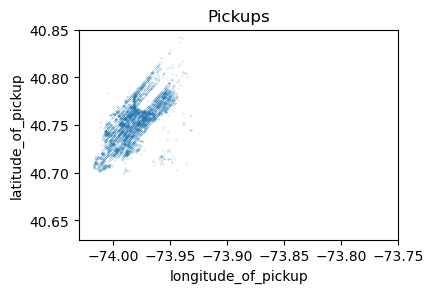

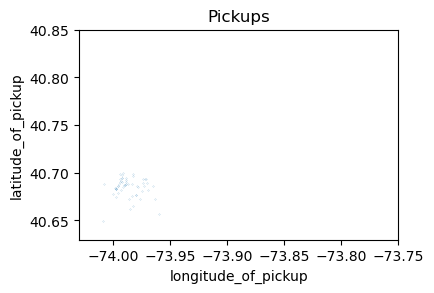

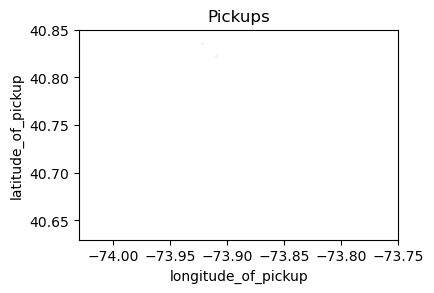

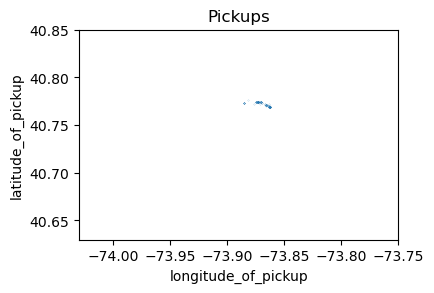

In [50]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

In [51]:
def plotDropAreaEachPlace(Area,data,ax):
    d=drop_place(Area,data)
    d.plot(y='latitude_of_dropoff',x='longitude_of_dropoff',kind="scatter",alpha=0.7,s=0.02,ax=ax,figsize=(14,6))
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    plt.title("Pickups")

    plt.ylim(city_lat_border)
    plt.xlim(city_long_border)
    plt.show()

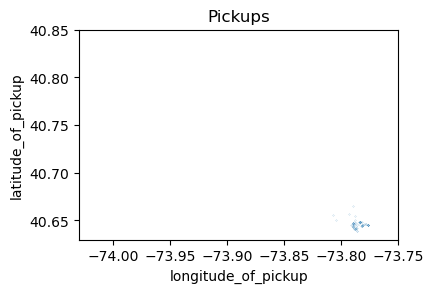

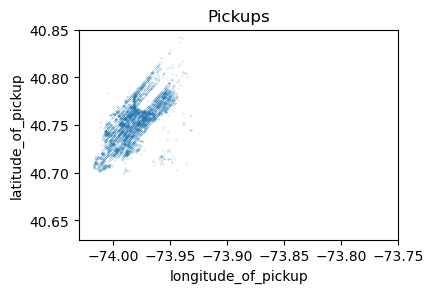

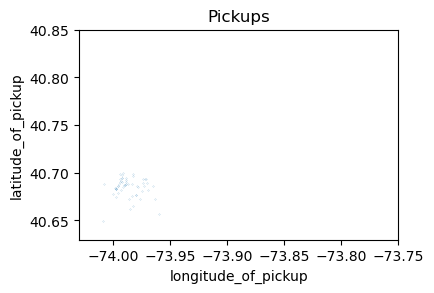

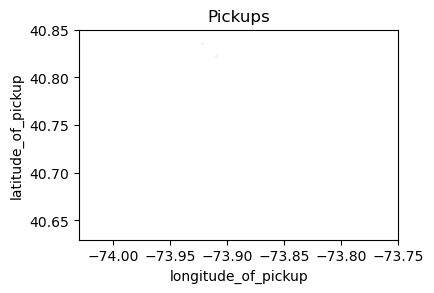

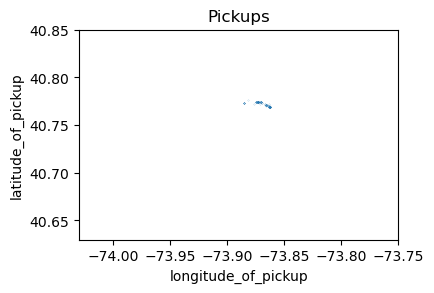

In [52]:
ax=plt.subplot(2,3,1)
plotPickupAreaEachPlace(JFK,df,ax)
ax=plt.subplot(2,3,2)
plotPickupAreaEachPlace(Manhattan,df,ax)
ax=plt.subplot(2,3,3)
plotPickupAreaEachPlace(Brooklyn,df,ax)
ax=plt.subplot(2,3,4)
plotPickupAreaEachPlace(Bronx,df,ax)
ax=plt.subplot(2,3,5)
plotPickupAreaEachPlace(LaGuardia,df,ax)

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g  pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [53]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [54]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['latitude_of_pickup'],row['longitude_of_pickup'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['latitude_of_pickup'],row['longitude_of_pickup'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['latitude_of_pickup'],row['longitude_of_pickup'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['latitude_of_pickup'],row['longitude_of_pickup'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['latitude_of_pickup'],row['longitude_of_pickup'],LaGuardia),axis=1)

In [55]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['latitude_of_dropoff'],row['longitude_of_dropoff'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['latitude_of_dropoff'],row['longitude_of_dropoff'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['latitude_of_dropoff'],row['longitude_of_dropoff'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['latitude_of_dropoff'],row['longitude_of_dropoff'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['latitude_of_dropoff'],row['longitude_of_dropoff'],LaGuardia),axis=1)

Airport trip has the fixed rate so it is good to have a column which show whether trip is airport trip or not

In [56]:
def isAirportTrip(pickupJFK,dropJFK,pickupLaG,dropLaG):    
    if pickupJFK==1 or dropJFK==1 or pickupLaG==1 or dropLaG==1:
        return 1
    return 0

In [57]:
df['isAirportTrip']=df.apply(lambda row:isAirportTrip(row['pickup_jfk'],row['drop_jfk'],row['pickup_laGuardia'],row['drop_laGuardia']),axis=1)

Till here we have pre-processed our data and feature engineering done

<h3> Save the pre-processed and feature_eng data in CSV file </h3>

In [58]:
df.to_csv("feature_model.csv",index=False)

<h3> Read Pre-processed file </h3>

In [59]:
df=pd.read_csv("feature_model.csv")
df.shape

(4837, 27)

<h1> Data Visualization </h1>

The next step is to get insight to data.

Remove any noisy or outlier data and understand data distribution

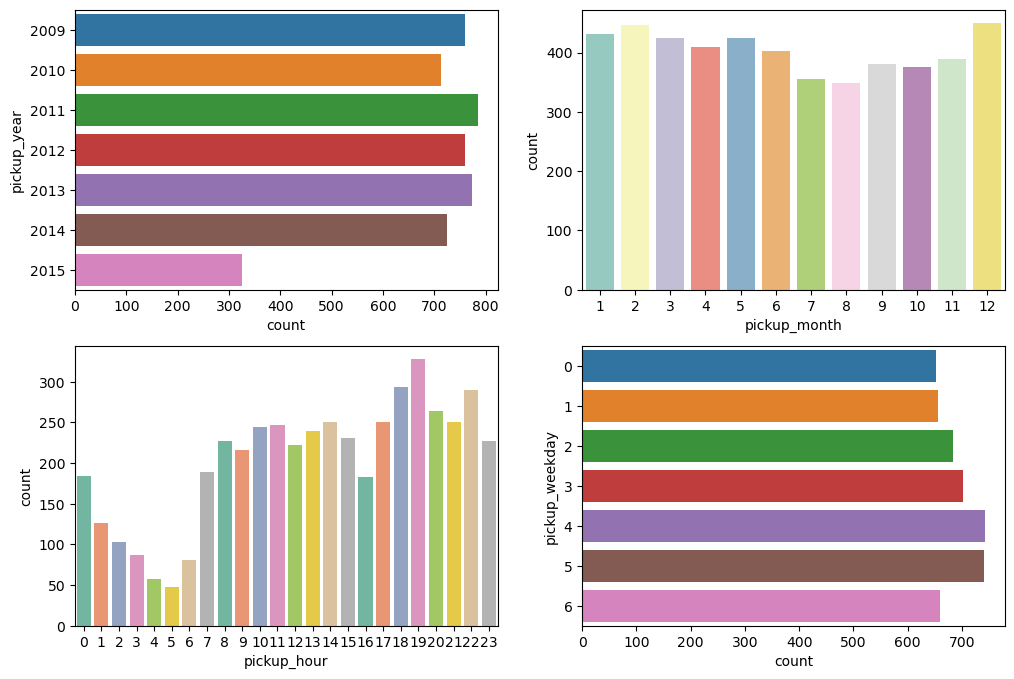

In [60]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(y='pickup_year', data=df)
plt.subplot(2,2,2)
sns.countplot(x='pickup_month', data=df,palette='Set3')
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

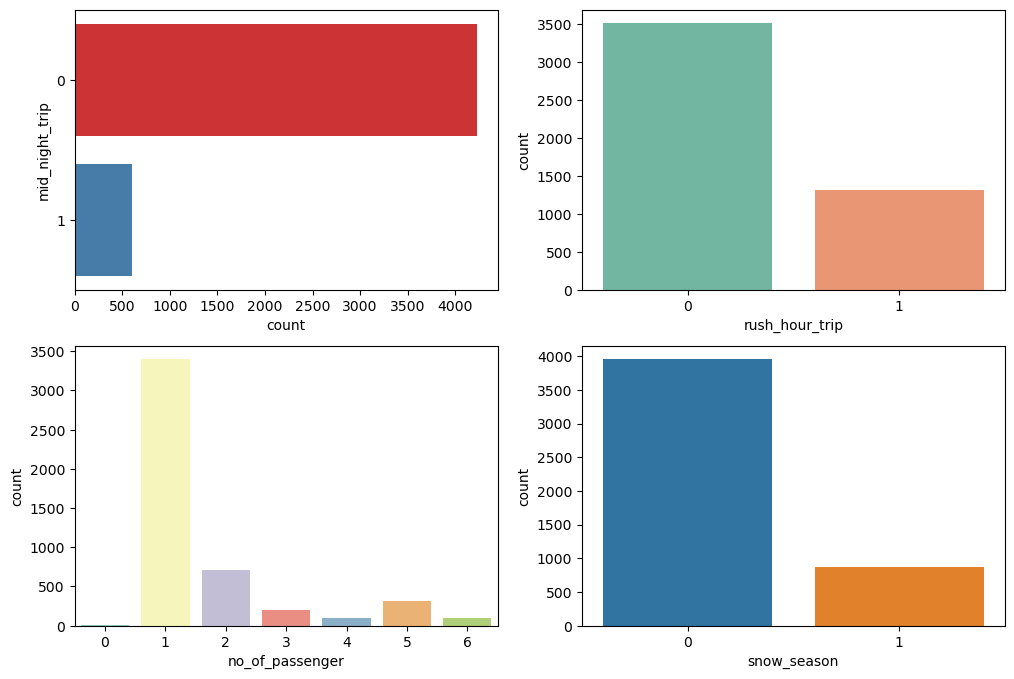

In [61]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='no_of_passenger', data=df,palette='Set3')

plt.subplot(2,2,4)
sns.countplot(x='snow_season', data=df)

plt.show()

<Axes: xlabel='isAirportTrip', ylabel='count'>

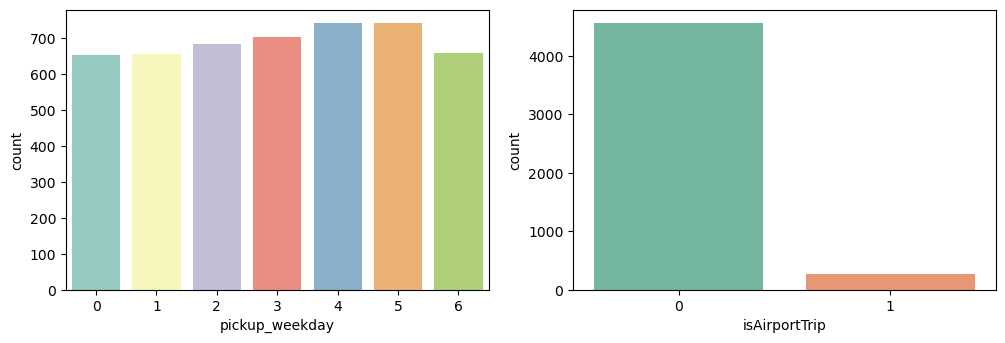

In [62]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x='pickup_weekday',data=df,palette='Set3')

plt.subplot(2,2,2)
sns.countplot(x='isAirportTrip',data=df,palette='Set2')

<h3> Pickup Location Count Plot</h3> 

<Axes: xlabel='pickup_laGuardia', ylabel='count'>

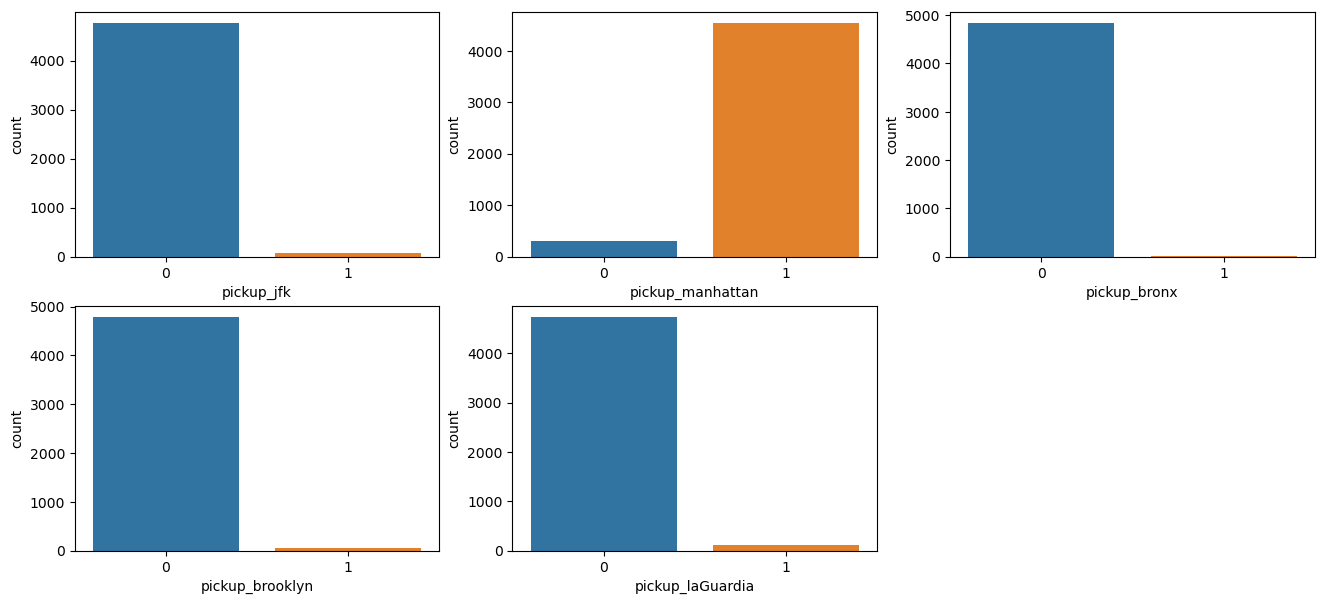

In [63]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
#plt.show()

<h3> Drop Location Count Plot</h3> 

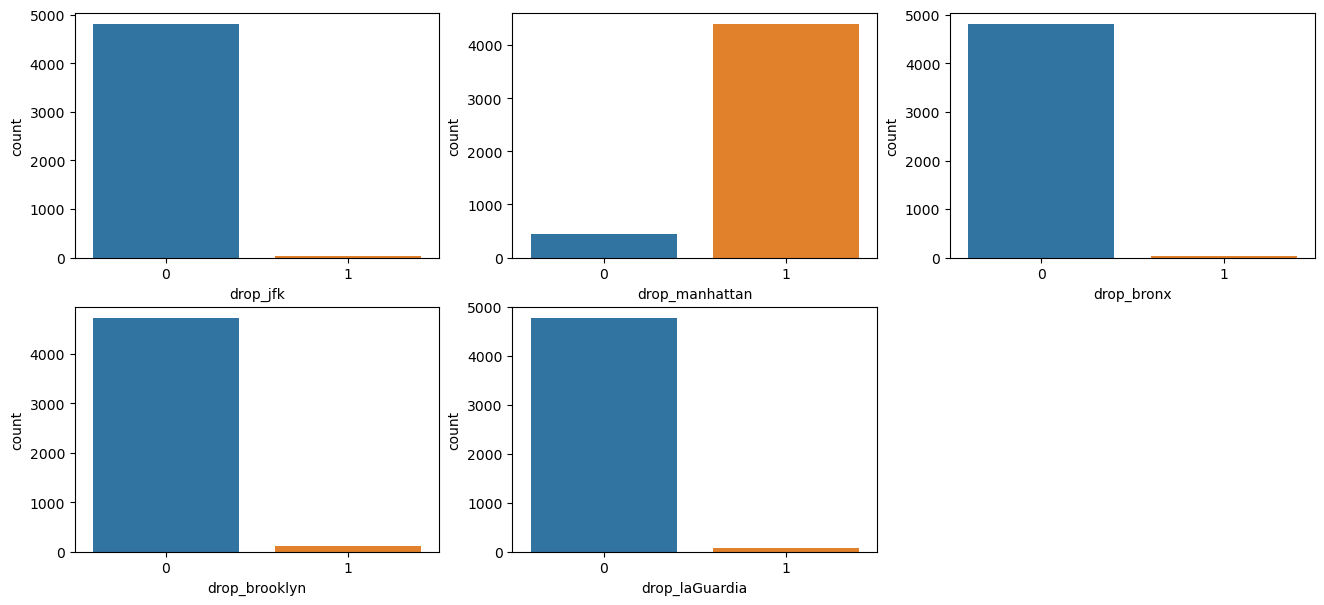

In [64]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

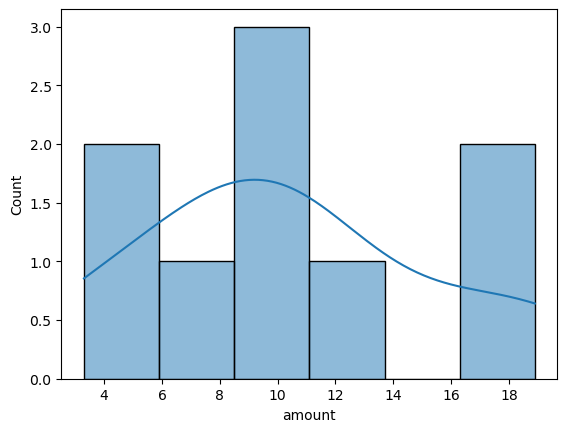

In [65]:
cancel_ride=df[(df['amount']>=0) & (df['no_of_passenger']==0)]
sns.histplot(cancel_ride['amount'],kde=True)

<Axes: xlabel='amount', ylabel='Count'>

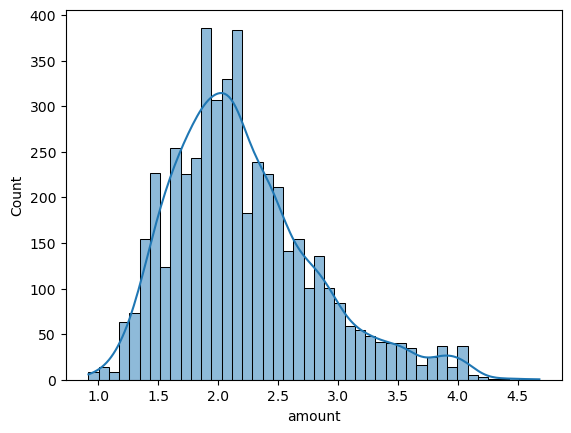

In [66]:
sns.histplot(np.log(df['amount']),kde=True)

<h3> Airport vs Non Aiport Trip Fare Distributinon </h3>

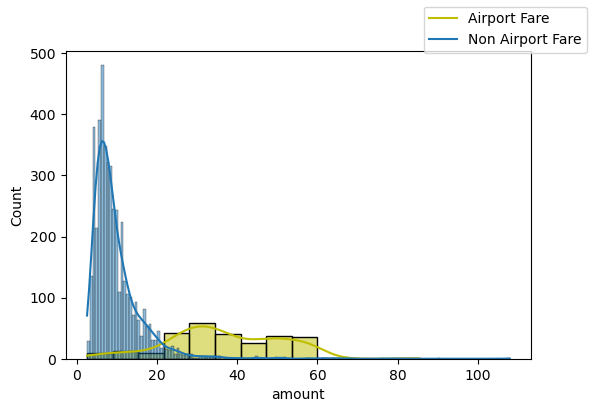

In [67]:
df_airport=df[df['isAirportTrip']==1]
df_non_airport=df[df['isAirportTrip']==0]

fig = plt.figure(figsize=(6,4))
sns.histplot(df_airport['amount'],kde=True,color="y")
sns.histplot(df_non_airport['amount'],kde=True)
fig.legend(labels=['Airport Fare','Non Airport Fare'])
plt.show()

<h3> Different Area Fare Distribution </h3>

In [68]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]

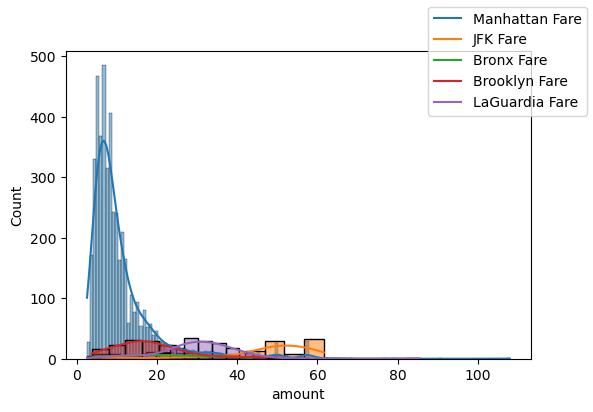

In [69]:
fig = plt.figure(figsize=(6,4))

sns.histplot(df_manhattan['amount'],kde=True)
sns.histplot(df_jfk['amount'],kde=True)
sns.histplot(df_bronx['amount'],kde=True)
sns.histplot(df_brooklyn['amount'],kde=True)
sns.histplot(df_LGD['amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

<h3> Fare Distribution of Manhattan </h3>

<Axes: xlabel='amount', ylabel='Count'>

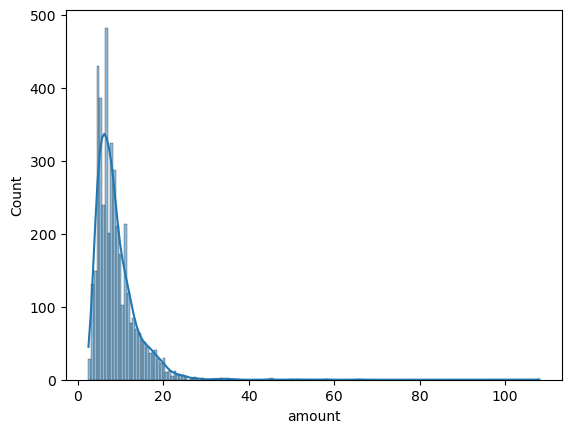

In [70]:
df_man=df[ (df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1)]
sns.histplot(df_man['amount'],kde=True)

In [71]:
df_man['amount'].sum()/df_man.shape[0]
df=df[~((df['pickup_manhattan'] ==1) & (df['drop_manhattan'] ==1) & (df['amount'] > 20))]

<h3> Fare Distribution at Different Time Zone </h3>

<Axes: xlabel='amount', ylabel='Count'>

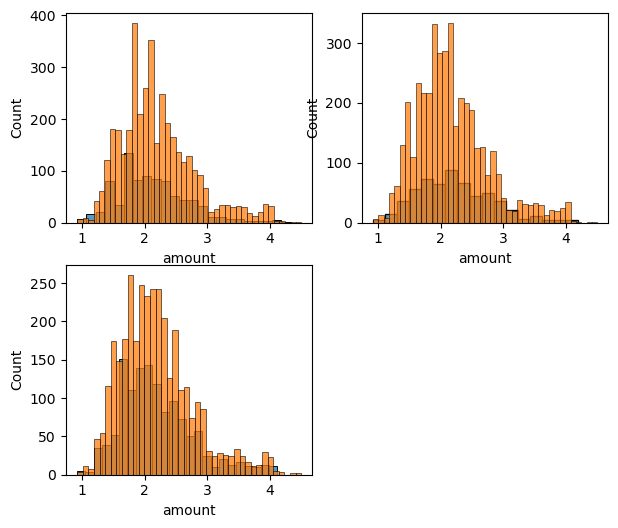

In [72]:
df_snow=df[df['snow_season']==1]
df_non_snow=df[df['snow_season']==0]

fig = plt.figure(figsize=(7,6))
ax=plt.subplot(2,2,1)
sns.histplot(np.log(df_snow['amount']),ax=ax)
sns.histplot(np.log(df_non_snow['amount']),ax=ax)


df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.histplot(np.log(df_mid['amount']),ax=ax)
sns.histplot(np.log(df_non_mid['amount']),ax=ax)

df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.histplot(np.log(df_rush_hour['amount']),ax=ax)
sns.histplot(np.log(df_non_rush_hour['amount']),ax=ax)

<h2> Correlation Heatmap</h2>

C:\Users\hp\AppData\Local\Temp\ipykernel_12812\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

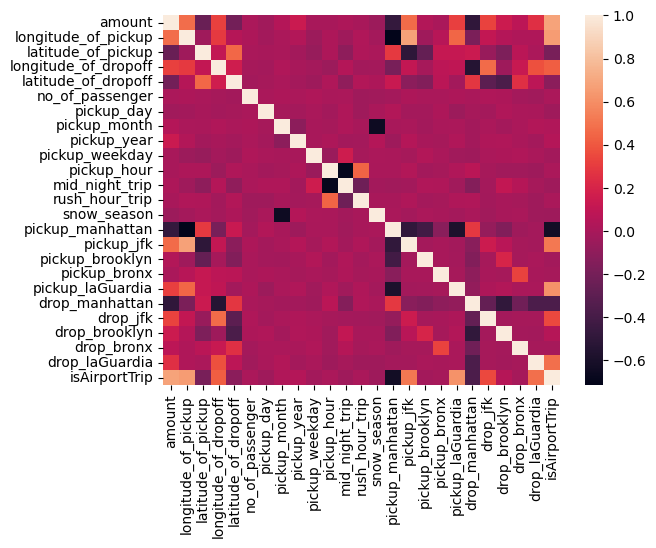

In [73]:
sns.heatmap(df.corr())